In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [127]:
# Load the dataset
data = pd.read_csv("CC_GENERAL.csv")

In [128]:
# PART 1: DATA VISUALIZATION
# 1. Exploring the dataset
print("Aperçu des 5 premières lignes du dataset :")
print(data.head())

Aperçu des 5 premières lignes du dataset :
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083

In [129]:
print("\nInformations générales sur le dataset :")
print(data.info())


Informations générales sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX            

In [130]:
print("\nStatistiques des valeurs manquantes dans chaque colonne :")
missing_values = data.isnull().sum()
print(missing_values)


Statistiques des valeurs manquantes dans chaque colonne :
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [131]:
#----------Étape 2 : Résumé statistique avec interprétation----------------
# Gérer les valeurs manquantes : remplacer par la moyenne pour les colonnes numériques
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns
data[numeric_columns] = data[numeric_columns].apply(lambda col: col.fillna(col.mean()), axis=0)

# Résumé statistique
summary = data.describe()
print("\nRésumé statistique :")
print(summary)




Résumé statistique :
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.00

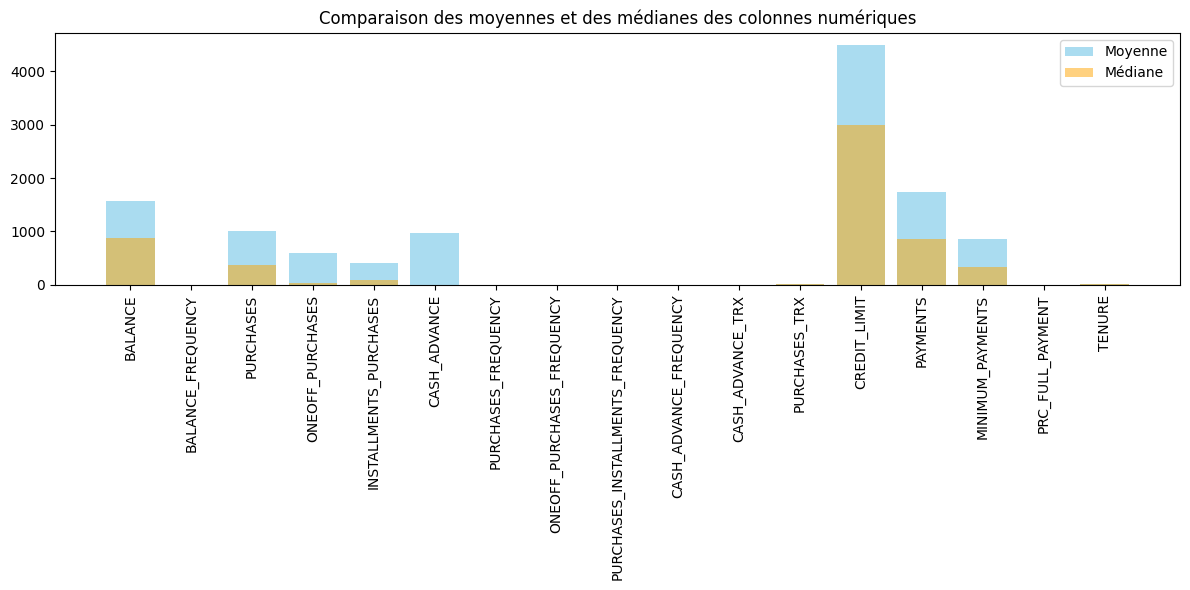

In [132]:
# Visualisation des statistiques : Moyenne et médiane
import matplotlib.pyplot as plt

mean_values = summary.loc["mean"]
median_values = summary.loc["50%"]  # Médiane (50e percentile)

plt.figure(figsize=(12, 6))
plt.bar(mean_values.index, mean_values, alpha=0.7, label="Moyenne", color="skyblue")
plt.bar(median_values.index, median_values, alpha=0.5, label="Médiane", color="orange")
plt.xticks(rotation=90)
plt.title("Comparaison des moyennes et des médianes des colonnes numériques")
plt.legend()
plt.tight_layout()
plt.show()

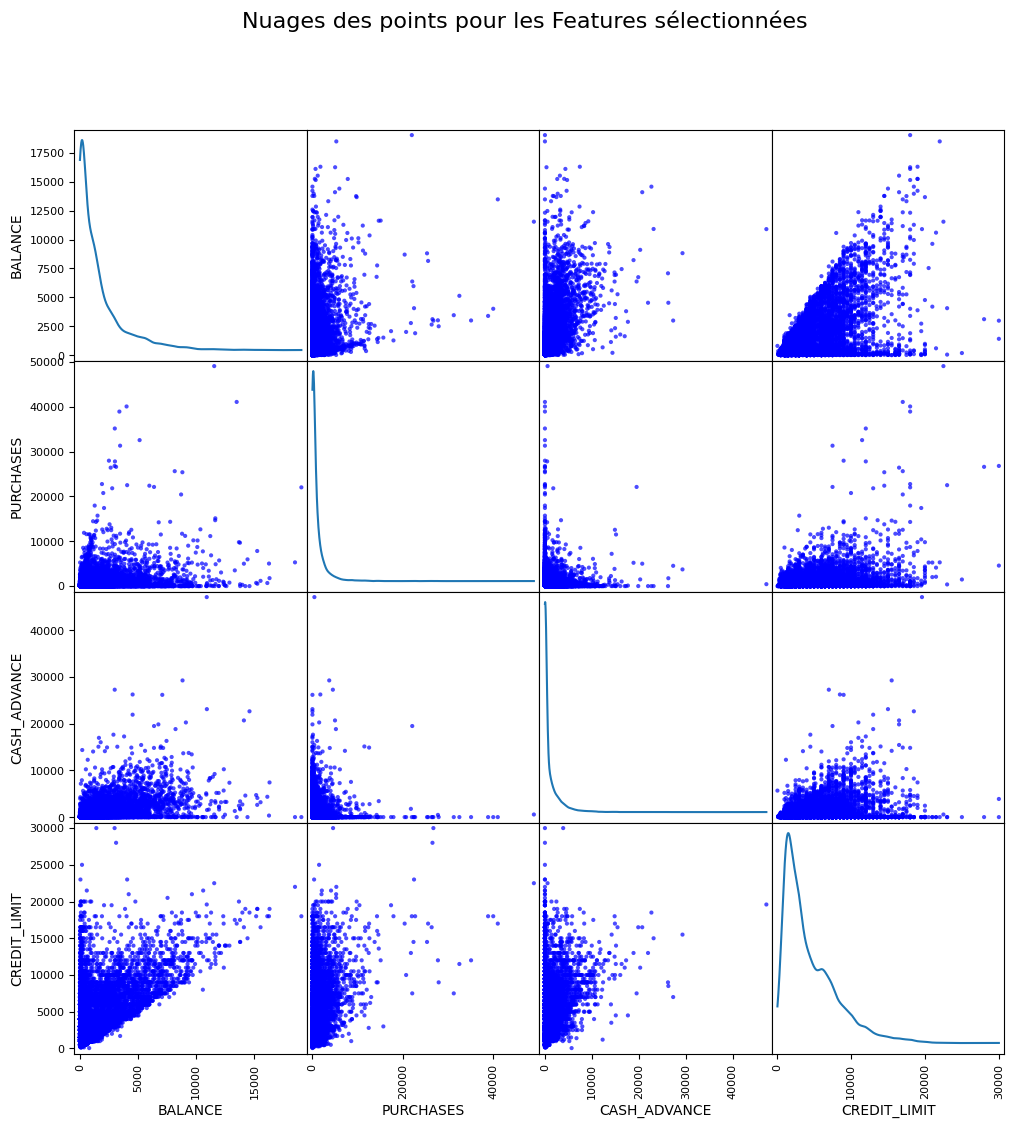

In [133]:
#-----Étape 3 : Nuages de points selon les propriétés « Features »--------

from pandas.plotting import scatter_matrix

# Sélection de certaines features importantes
selected_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT"]

# Scatter matrix pour visualiser les relations entre ces colonnes
scatter_matrix(data[selected_features], figsize=(12, 12), alpha=0.7, diagonal="kde", color="blue")
plt.suptitle("Nuages des points pour les Features sélectionnées", fontsize=16)
plt.show()


In [134]:
#----------Étape 4 : Application des techniques PCA et t-SNE------------
import matplotlib.pyplot as plt

# Réduction des dimensions avec PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_scaled)

# Stocker les résultats PCA dans un DataFrame pour réutilisation en partie 2
df_pca = pd.DataFrame(data=pca_features, columns=["PC1", "PC2"])

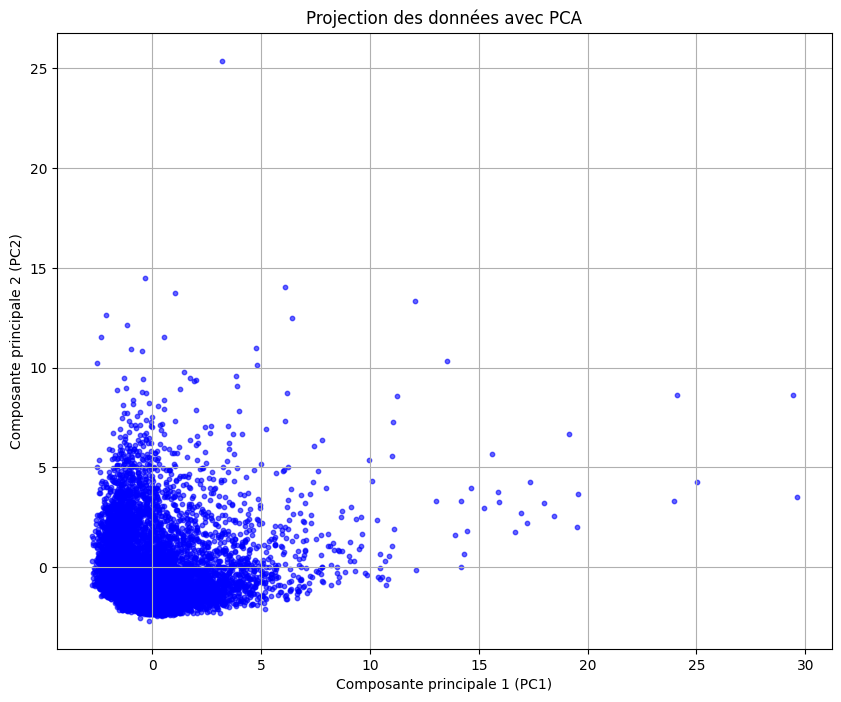

In [135]:
#PCA (Principal Component Analysis
# Visualisation des données projetées avec PCA
plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], s=10, c="blue", alpha=0.6)
plt.title("Projection des données avec PCA")
plt.xlabel("Composante principale 1 (PC1)")
plt.ylabel("Composante principale 2 (PC2)")
plt.grid(True)
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.002s...
[t-SNE] Computed neighbors for 8950 samples in 0.497s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.427264
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.965378
[t-SNE] KL divergence after 1000 iterations: 1.501112


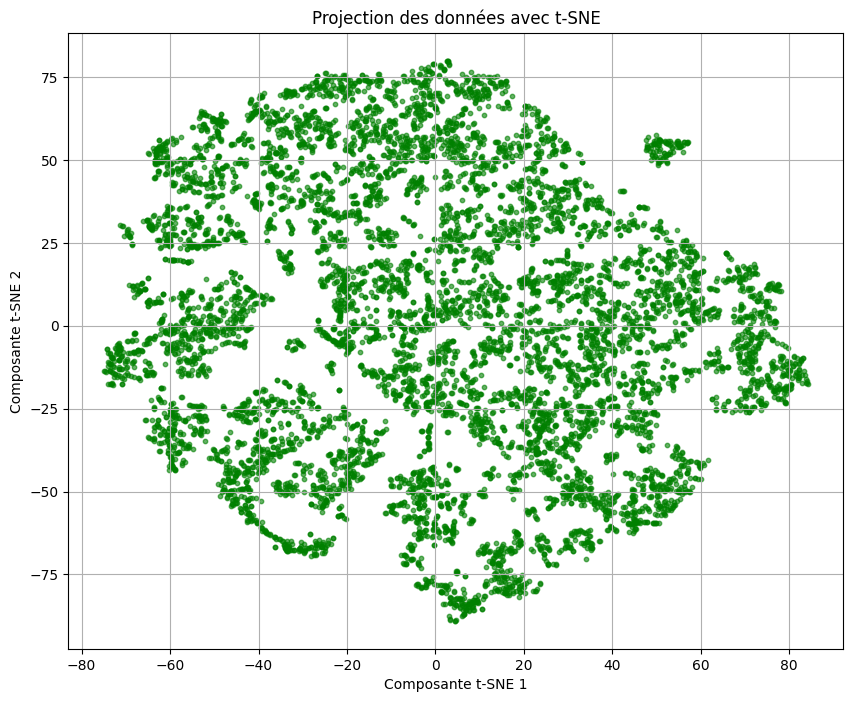

In [136]:
#--------t-SNE (t-Distributed Stochastic Neighbor Embedding)------------
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

# Réduction des dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, verbose=1)
tsne_features = tsne.fit_transform(data_scaled)

# Stocker les résultats t-SNE dans un DataFrame pour réutilisation en partie 2
df_tsne = pd.DataFrame(data=tsne_features, columns=["t-SNE1", "t-SNE2"])

# Visualisation des données projetées avec t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], s=10, c="green", alpha=0.6)
plt.title("Projection des données avec t-SNE")
plt.xlabel("Composante t-SNE 1")
plt.ylabel("Composante t-SNE 2")
plt.grid(True)
plt.show()


In [137]:
#------------ Partie 2 : Clustering --------------

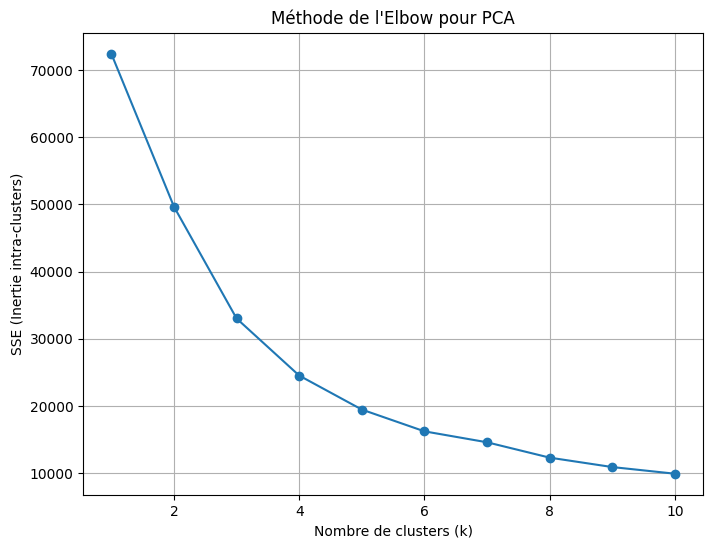

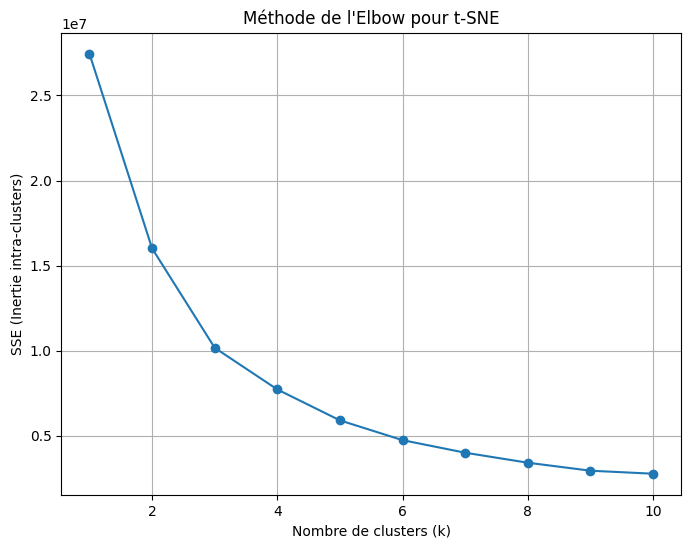

In [138]:
# ------- Étape 1 : Modèles de clustering avec KMeans ----
# Méthode d'Elbow pour PCA et t-SNE

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Méthode de l'Elbow pour PCA
sse_pca = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse_pca.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, sse_pca, marker='o')
plt.title("Méthode de l'Elbow pour PCA")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("SSE (Inertie intra-clusters)")
plt.grid(True)
plt.show()

# Méthode de l'Elbow pour t-SNE
sse_tsne = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_tsne)
    sse_tsne.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, sse_tsne, marker='o')
plt.title("Méthode de l'Elbow pour t-SNE")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("SSE (Inertie intra-clusters)")
plt.grid(True)
plt.show()


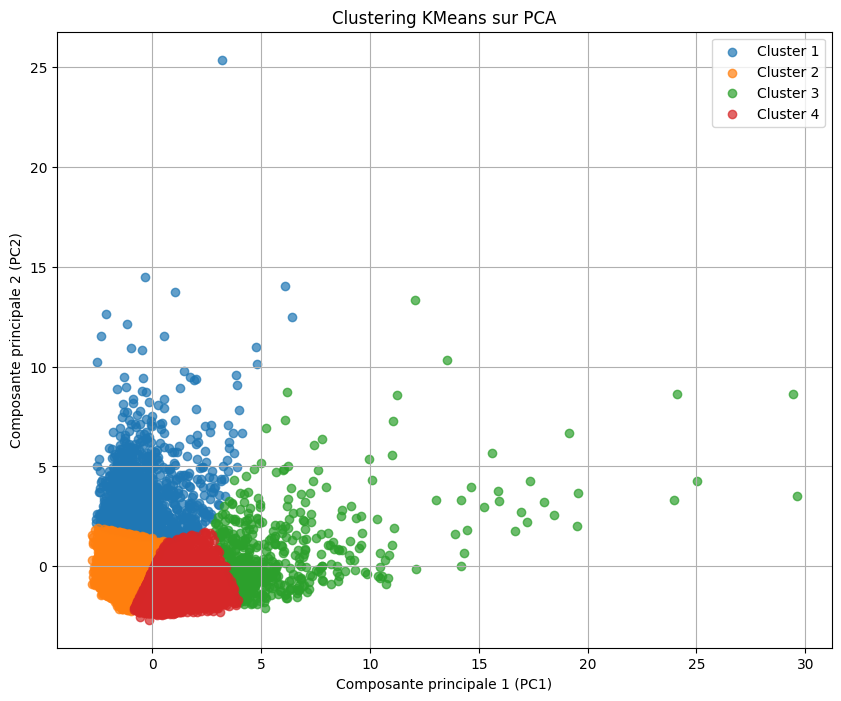

In [139]:
# Clustering et Visualisation des résultats KMeans

# KMeans sur PCA
kmeans_pca = KMeans(n_clusters=4, random_state=42)  # Adaptez le nombre optimal de clusters
labels_pca = kmeans_pca.fit_predict(df_pca)

plt.figure(figsize=(10, 8))
for cluster in range(4):
    cluster_data = df_pca[labels_pca == cluster]
    plt.scatter(
        cluster_data["PC1"], cluster_data["PC2"],
        label=f"Cluster {cluster + 1}", alpha=0.7
    )
plt.title("Clustering KMeans sur PCA")
plt.xlabel("Composante principale 1 (PC1)")
plt.ylabel("Composante principale 2 (PC2)")
plt.legend()
plt.grid(True)
plt.show()



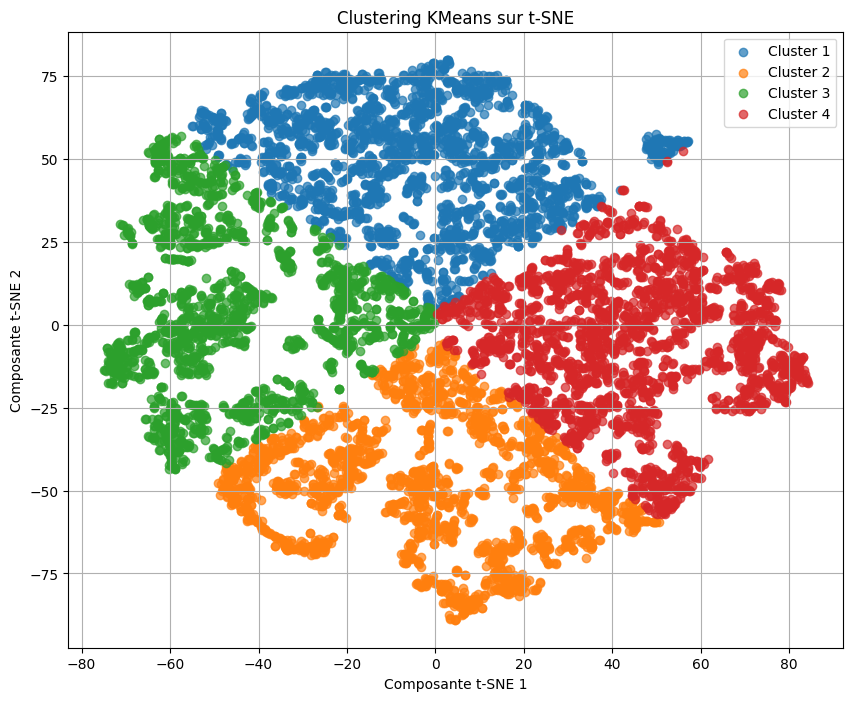

In [140]:
# KMeans sur t-SNE
kmeans_tsne = KMeans(n_clusters=4, random_state=42)
labels_tsne = kmeans_tsne.fit_predict(df_tsne)

plt.figure(figsize=(10, 8))
for cluster in range(4):
    cluster_data = df_tsne[labels_tsne == cluster]
    plt.scatter(
        cluster_data["t-SNE1"], cluster_data["t-SNE2"],
        label=f"Cluster {cluster + 1}", alpha=0.7
    )
plt.title("Clustering KMeans sur t-SNE")
plt.xlabel("Composante t-SNE 1")
plt.ylabel("Composante t-SNE 2")
plt.legend()
plt.grid(True)
plt.show()

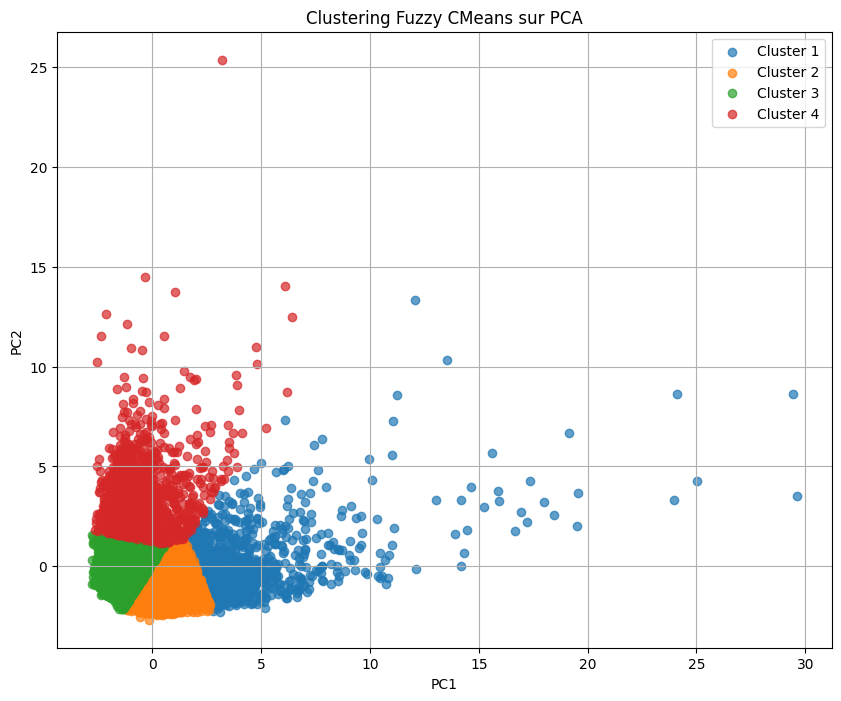

In [141]:
# -------- Étape 2 : Fuzzy CMeans ------------------
import skfuzzy as fuzz
import numpy as np

# Fuzzy CMeans sur PCA
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(df_pca.T, c=4, m=2, error=0.005, maxiter=1000)
fuzzy_labels = np.argmax(u, axis=0)

plt.figure(figsize=(10, 8))
for cluster in range(4):
    cluster_data = df_pca[fuzzy_labels == cluster]
    plt.scatter(
        cluster_data["PC1"], cluster_data["PC2"],
        label=f"Cluster {cluster + 1}", alpha=0.7
    )
plt.title("Clustering Fuzzy CMeans sur PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()



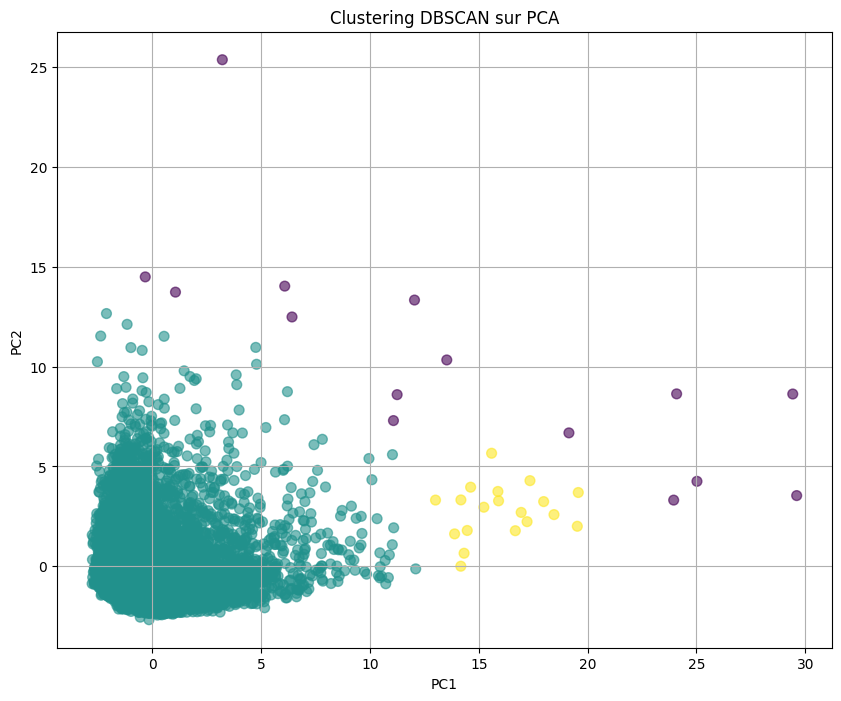

In [142]:
# -------------- Étape 3 : DBSCAN ------------------

from sklearn.cluster import DBSCAN

# DBSCAN sur PCA
dbscan_pca = DBSCAN(eps=2, min_samples=5).fit(df_pca)
dbscan_labels_pca = dbscan_pca.labels_

plt.figure(figsize=(10, 8))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=dbscan_labels_pca, cmap="viridis", s=50, alpha=0.6)
plt.title("Clustering DBSCAN sur PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


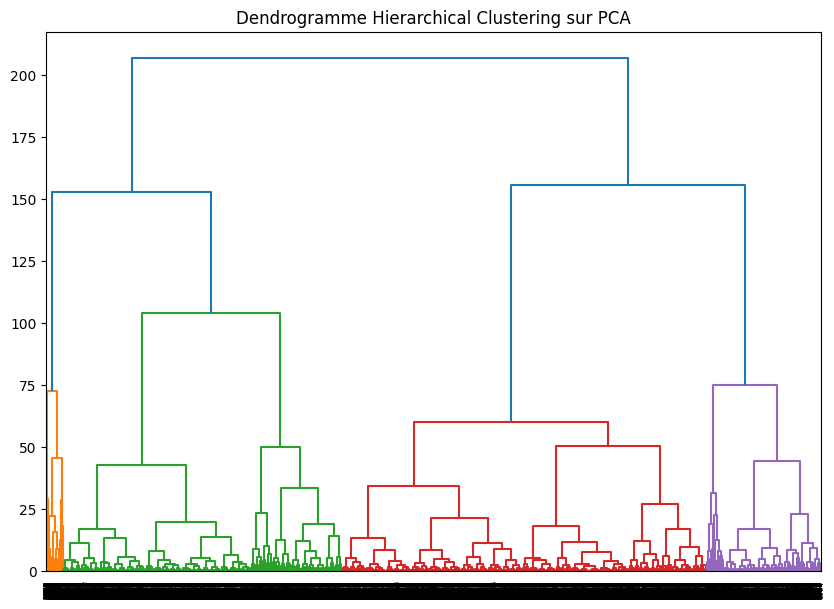

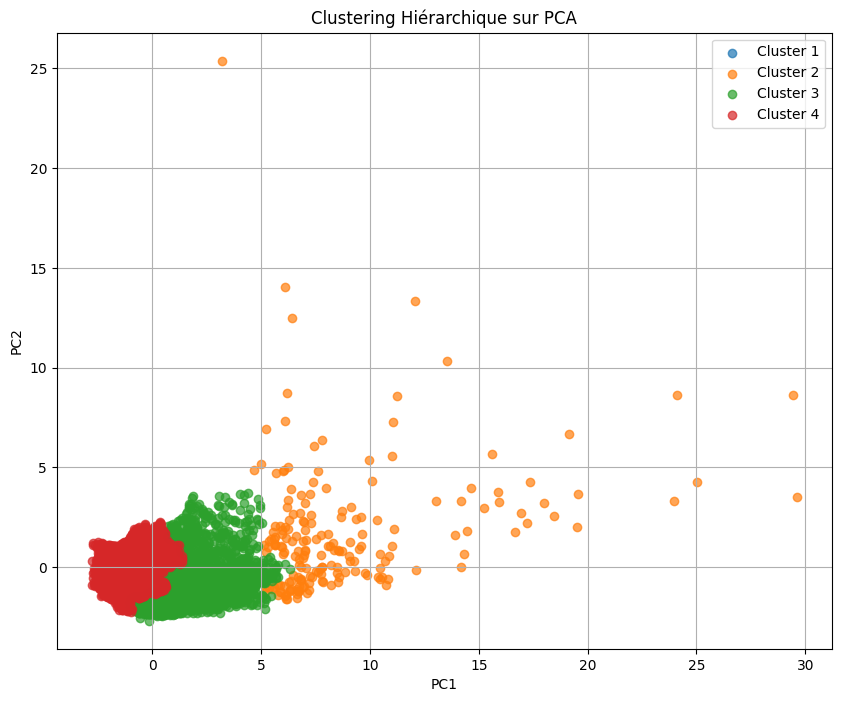

In [143]:
# ------------- Étape 4 : Hierarchical Clustering ------------

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Hierarchical clustering sur PCA
linked = linkage(df_pca, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogramme Hierarchical Clustering sur PCA")
plt.show()

# Obtenir les clusters à partir du dendrogramme
hierarchical_labels = fcluster(linked, t=4, criterion='maxclust')

plt.figure(figsize=(10, 8))
for cluster in range(4):
    cluster_data = df_pca[hierarchical_labels == cluster]
    plt.scatter(
        cluster_data["PC1"], cluster_data["PC2"],
        label=f"Cluster {cluster + 1}", alpha=0.7
    )
plt.title("Clustering Hiérarchique sur PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


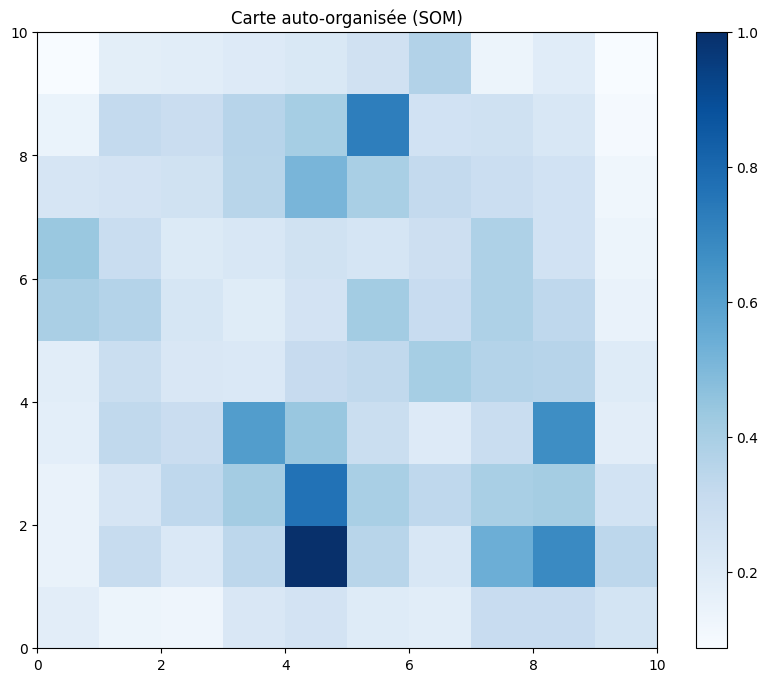

In [149]:
# ------------ Étape 5 : SOM (Self-Organizing Map) -----------

from minisom import MiniSom

# Initialisation du SOM
som = MiniSom(x=10, y=10, input_len=2, sigma=0.5, learning_rate=0.5)
som.random_weights_init(df_pca.to_numpy())
som.train_random(df_pca.to_numpy(), num_iteration=100)

# Visualisation du SOM
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap="Blues")
plt.title("Carte auto-organisée (SOM)")
plt.colorbar()
plt.show()
